In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
abalone_data = pd.read_csv('abalone.csv')
abalone_data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


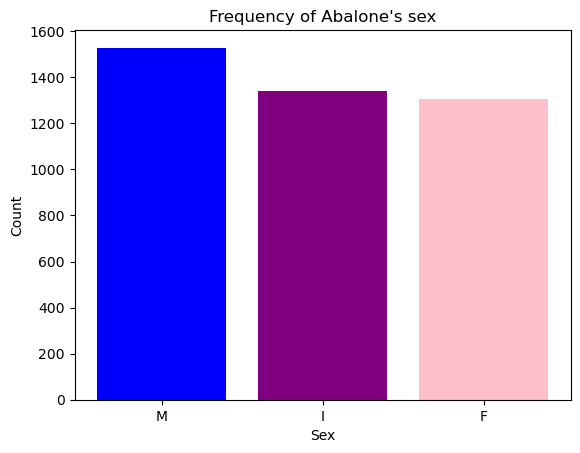

In [3]:
sexCount = abalone_data['Sex'].value_counts()

colors = ['blue', 'purple', 'pink']
plt.bar(sexCount.index, sexCount.values, color=colors)

plt.xticks(rotation=0)  
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title("Frequency of Abalone's sex")  

plt.show()

In [4]:
abalone_data.isnull().values.any()

False

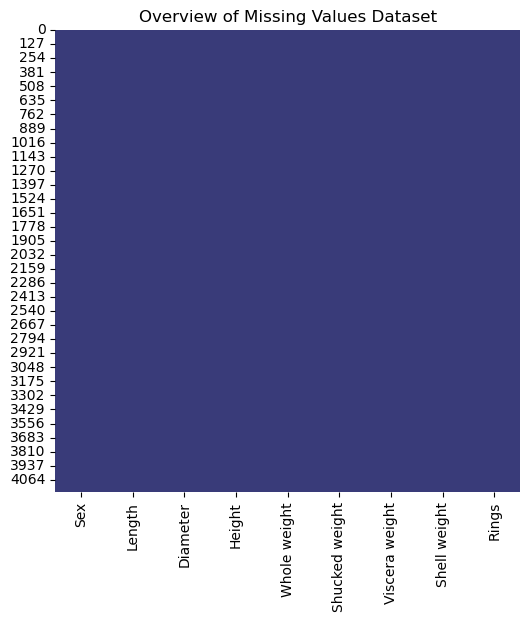

In [5]:
#check for missing values
abalone_data.isnull().sum()

#heatmap for missing values
plt.figure(figsize=(6,6))
sns.heatmap(abalone_data.isnull(), cmap="tab20b", cbar=False).set_title('Overview of Missing Values Dataset')
plt.show()

C:\Users\yeoh9\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


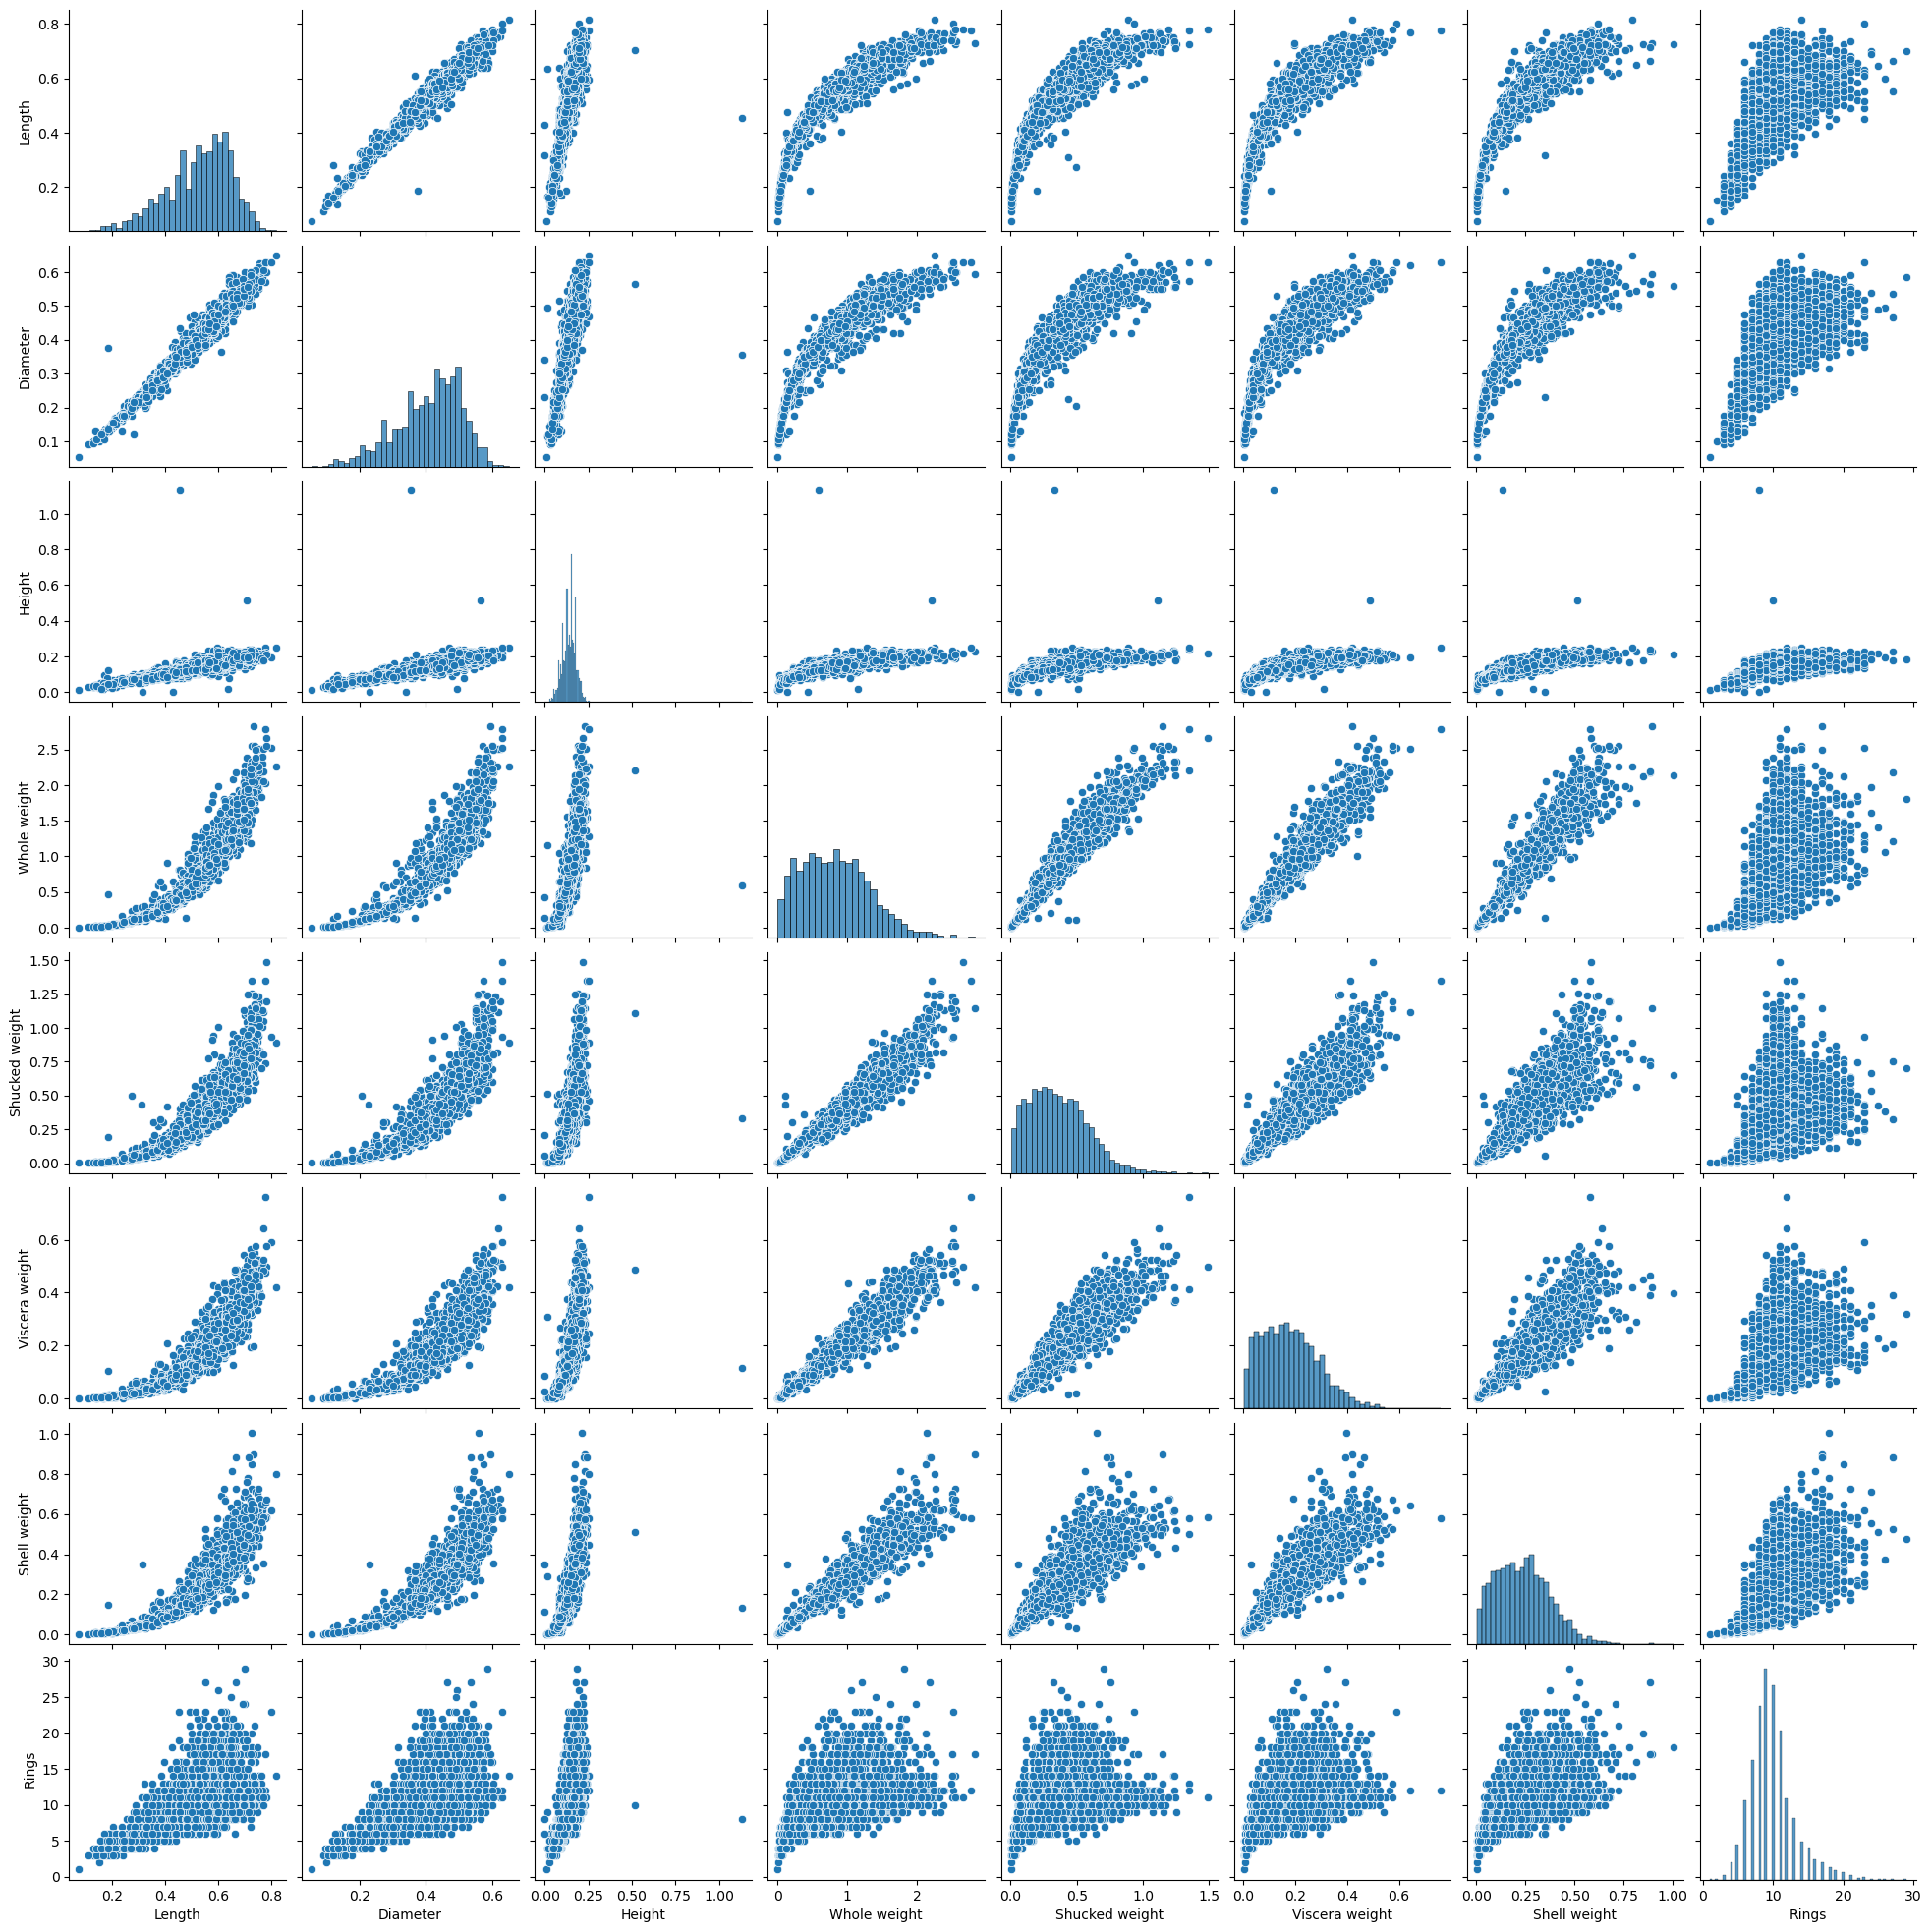

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

sns.pairplot(abalone_data)


In [8]:
abalone_data.describe(exclude=['object'])

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


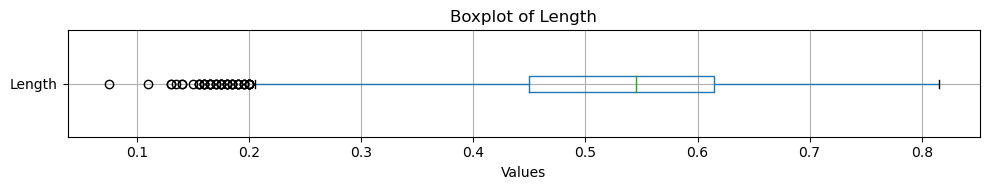

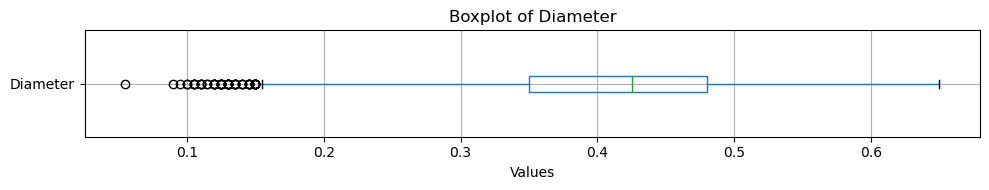

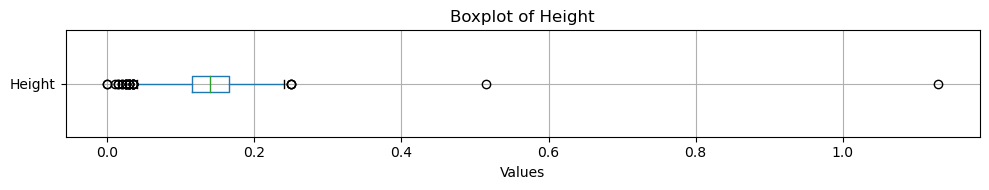

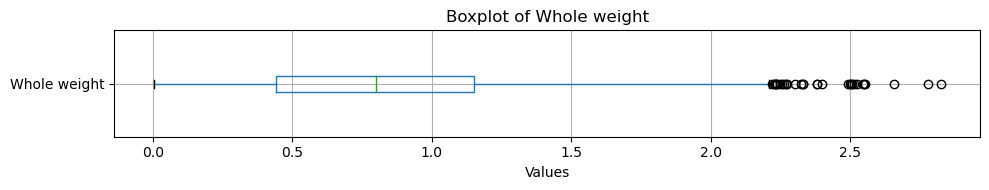

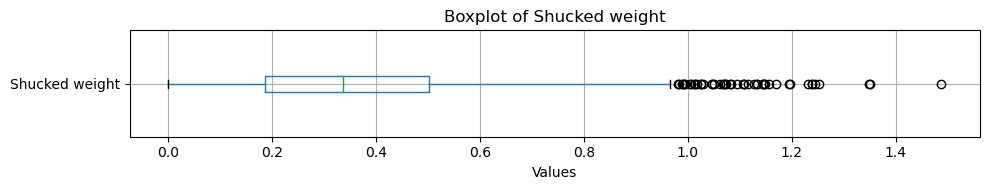

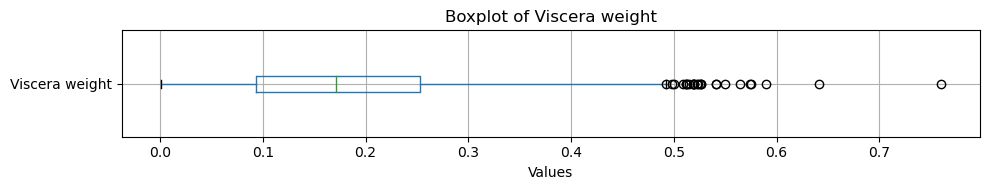

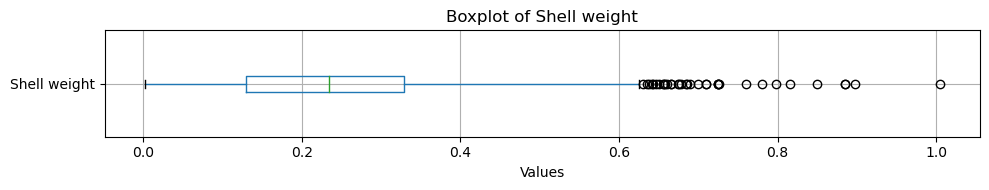

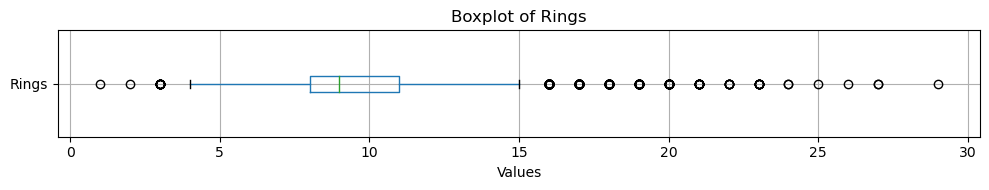

In [9]:
# Load the dataset into a DataFrame
abalone_data = pd.read_csv('abalone.csv')

dataForPlot = abalone_data.drop(columns = 'Sex' , axis=1)

for column in dataForPlot.columns:
    plt.figure(figsize=(10, 2))  # Adjust figure size if necessary
    dataForPlot.boxplot(column=[column], vert = False)
    plt.title('Boxplot of {}'.format(column))
    plt.xlabel('Values')
    plt.tight_layout()
    plt.show()

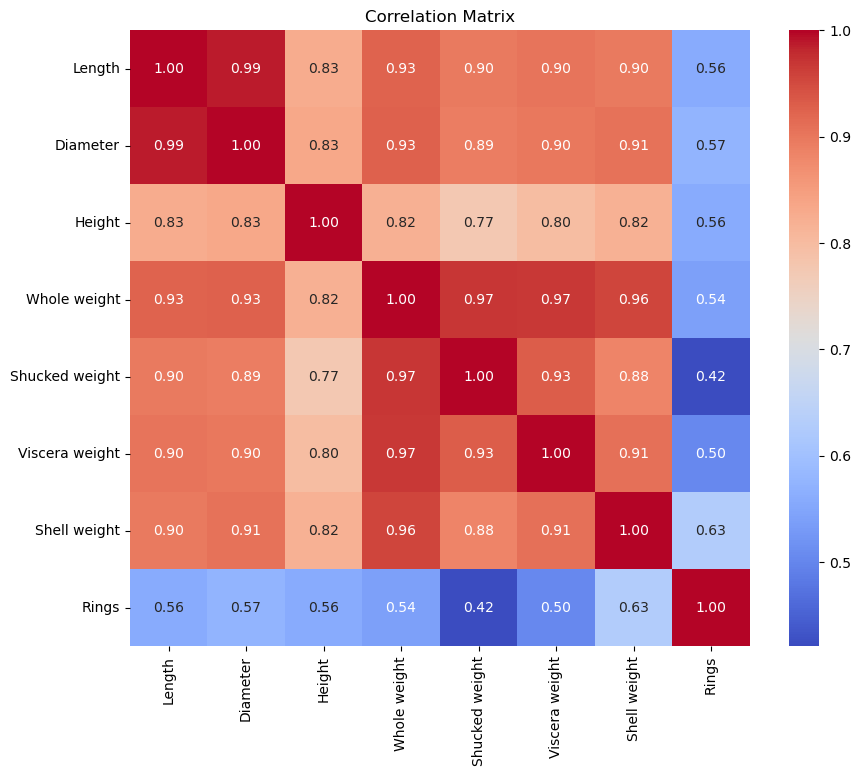

In [10]:

correlation_matrix = dataForPlot.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [11]:
from scipy import stats


for column in dataForPlot.columns:
    if column != 'z_score':
        dataForPlot['z_score'] = stats.zscore(dataForPlot[column])
        outliers = dataForPlot[(dataForPlot['z_score'] > 3) | (dataForPlot['z_score'] < -3)]
        print(f"Outliers for {column}:")
        print(outliers[[column, 'z_score']])
        print("\n")

Outliers for Length:
      Length   z_score
236    0.075 -3.739154
237    0.130 -3.281120
238    0.110 -3.447678
239    0.160 -3.031284
526    0.155 -3.072923
696    0.155 -3.072923
719    0.150 -3.114562
720    0.160 -3.031284
1429   0.140 -3.197841
1986   0.135 -3.239481
1987   0.160 -3.031284
2114   0.130 -3.281120
2381   0.155 -3.072923
3899   0.140 -3.197841
3902   0.160 -3.031284


Outliers for Diameter:
      Diameter   z_score
236      0.055 -3.556267
237      0.100 -3.102766
238      0.090 -3.203544
526      0.110 -3.001988
694      0.110 -3.001988
696      0.105 -3.052377
719      0.100 -3.102766
720      0.110 -3.001988
1429     0.105 -3.052377
1987     0.110 -3.001988
2114     0.095 -3.153155
3837     0.105 -3.052377
3899     0.105 -3.052377


Outliers for Height:
      Height    z_score
236    0.010  -3.096845
1257   0.000  -3.335953
1417   0.515   8.978125
2051   1.130  23.683287
3996   0.000  -3.335953


Outliers for Whole weight:
      Whole weight   z_score
165        